<a href="https://colab.research.google.com/github/kmsaidev/dalc-peanut/blob/ai/optimized_peanut_knn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import sys
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

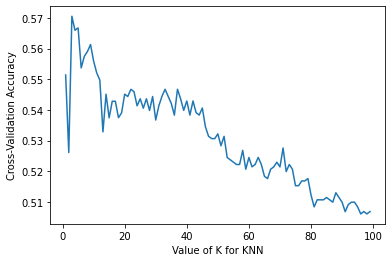

In [17]:
r = []
g = []
b = []
color_target = []
cnt = 0
with open("color_hex.txt", 'r') as input:
  lines = input.read().splitlines()
  for line in lines:
    line = line.replace(' ', '')
    if line == "":
        continue
    elif line[-1] != '1' and line[-1] != '2' and line[-1] != '3' and line[-1] != '4':
        continue
    else:
        cnt+=1
        color_info = line.split(',')
        r.append(int(color_info[0][1:3], 16))
        g.append(int(color_info[0][3:5], 16))
        b.append(int(color_info[0][5:7], 16))
        color_target.append(int(color_info[1]))
color_data = [[r, g, b] for r, g, b in zip(r, g, b)]

input = np.array(color_data)
target = np.array(color_target)
np.random.seed(42)
index = np.arange(cnt)
np.random.shuffle(index)

train_input = input[index[:1043]]
train_target = target[index[:1043]]

test_input = input[index[1043:]]
test_target = target[index[1043:]]

from sklearn.model_selection import cross_val_score
k_range = range(1,100)             
k_score = []                       

for k in k_range:
  knn = KNeighborsClassifier(k)
  scores = cross_val_score(knn, input, target, cv=10, scoring = "accuracy")  
  k_score.append(scores.mean()) 
import matplotlib.pyplot as plt  
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show() 

In [18]:
knn = KNeighborsClassifier(3)            
knn.fit(train_input, train_target)
knn.score(test_input, test_target)

0.5747126436781609